# Challenge Problem Week 1

Hepatitis B (HEP B) is a liver infection caused by the hepatitis B virus (HBV). The infection causes inflammation of the liver and if not properly treated, the virus can lead to liver disease such as cirrhosis or liver cancer. 
HEP B is the most primary causes of liver cancer, the one of the leading cause of cancer deaths in the world, therfore making it a major global health problem. HEP B is up to 100 times more infectious than the HIV/AIDS virus. Two billion people (1 in 3) have been infected and more than 292 million people are living with a chronic hepatitis B infection. Although HEP B is treatable and preventable about 884,000 people die each year.

The virus is transmitted through the blood and infected bodily fluids. It can be passed to others through direct contact with blood, unprotected sex, use of illegal drugs, unsterilized or contaminated needles, and from an infected woman to her newborn during pregnancy or childbirth. Most people do not show symptoms and the only way to know you are infected is by getting tested.

![hepb](https://images.onhealth.com/images/slideshow/hepatitis-s1-liver-hepatitis-virus.jpg)

**Goal**: Use the NHANES data set to predict whether a patient has HEP B or not. We want to determine which attributes are the most meaningful to the predictive models. We want to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Essentially is there a way to identify the population of those infected without testing them? 

Source: https://www.hepb.org/what-is-hepatitis-b/what-is-hepb/ 

# National Health and Nutrition Examination Survey NHANES 
To investigate our research problem we will be using the NHANES database. NHANES is a program of studies designed to assess the health and nutritional status of adults and children in the United States. The survey is unique in that it combines interviews and physical examinations. The survey examines a nationally representative sample of about 5,000 persons each year. These persons are located in counties across the country, 15 of which are visited each year. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The examination component consists of medical, dental, and physiological measurements, as well as laboratory tests administered by highly trained medical personnel.

Source: Centers for Disease Control and Prevention (CDC). National Center for Health Statistics (NCHS). National Health and Nutrition Examination Survey Data. Hyattsville, MD: U.S. Department of Health and Human Services, Centers for Disease Control and Prevention, [2019][https://www.cdc.gov/nchs/nhanes/about_nhanes.htm#data].

Below are some general steps to begin analyzing this problem. Apply the new material you learned in class and have fun! (:

1. Import the data  
2. Decide what variables are most relevant  
3. Summary statistics of the data  
4. Data Cleaning (Important!) Note this may a tedious process  
a. Missing data  
b. Transform/Normalize data  
4. Data Visualization  
5. Data analysis  
a. Create dummy variables  
b. Create training and test sets  
c. Statistical methodology  
6. Scoring metrics  
confusion matrix, roc curve  


In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import math
import seaborn as sns

## Import data
Read in the data set and look at the first ten lines

In [2]:
dataset = pd.read_csv("challengeProblem1.train.csv")
dataset.head(10)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2595,2597,2599,2601,2603,2605,2607,2609,2611,2613,2615,2617,2619,2621,2623,2625,2627,2629,2631,2633,2635,2637,2639,2641,2643,2645,2647,2649,3194,4161,6581,6582,6584,6598,6599,6601,6855,6857,8094,8572,8573) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,DMQMILIT,...,MCQ300C.mcq.2,MCQ365A.mcq.2,MCQ365B.mcq.2,MCQ365C.mcq.2,MCQ365D.mcq.2,MCQ370A.mcq.2,MCQ370B.mcq.2,MCQ370C.mcq.2,MCQ370D.mcq.2,OSQ230.mcq.2
0,51624.0,6,2,1,34,409.0,410.0,3,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51626.0,6,2,1,16,202.0,202.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51627.0,6,2,1,10,131.0,132.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51628.0,6,2,2,60,722.0,722.0,4,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51630.0,6,2,2,49,596.0,596.0,3,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51632.0,6,2,1,10,124.0,126.0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,51634.0,6,2,1,10,121.0,121.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,51635.0,6,2,1,80,NaN,NaN,3,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,51638.0,6,2,1,9,115.0,116.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,51641.0,6,2,1,13,156.0,156.0,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#dropping unnecessary variables (don't worry about this)
mydat = dataset[dataset.columns.drop(list(dataset.filter(regex='WT')))]
mydat = dataset[dataset.columns.drop(list(dataset.filter(regex='SDM')))]

Awesome, looks like the data loaded in properly. Let's continue by looking at variables that may be predictive of hepatitis B. For beginners, I would suggest conducting a literature review on previous research of hepatitis B.

## Select Features of Interest
Once you have selected some variables in the NHANES data set only looking at what you are interested in. It is in your best interest to rename the variables.

In [4]:
# Write your code here

# create a subset of the data you want to analyze
mydat = dataset[['LBXHBC', 'DMDMARTL', 'INDFMPIR','MCQ203', 'LBDHI', 'IMQ020', 'LBXHBS', 'SXQ292', 'ALQ120Q', 'LBDTCSI', 'RIAGENDR', 'BPQ020', 'RIDRETH3', 'MCQ092', 'RIDAGEYR']]

# rename the variables
mydat = mydat.rename(index = str, columns = {"LBXHBC": "HEPB", "DMDMARTL": "Marriage", "INDFMPIR": "Income", "MCQ203": "Jaundice", "LBDHI": "HIV", "LBXHBS": "HEPBSurfaceAntibody", "IMQ020":"Immunization", "SXQ292":"SexualOrientation", "ALQ120Q":"Alcohol", "LBDTCSI":"Cholesterol", "RIAGENDR":"Sex", "BPQ020":"Hypertension", "RIDRETH3":"Ethnicity", "MCQ092":"BloodTransfusion", "RIDAGEYR": "Age" })


Remember the goal is to create a balanced model that can predict with a high sensitivity and high specificity while using the **least amount of features**. Next, we will look at some summary statistics of the variables you chose.

## View summary statistics
Some useful functions in pandas are describe() and info()

In [5]:
# Write your code here
mydat.describe()

,HEPB,Marriage,Income,Jaundice,HIV,Immunization,HEPBSurfaceAntibody,SexualOrientation,Alcohol,Cholesterol,Sex,Hypertension,Ethnicity,BloodTransfusion,Age
count,19821.000000,14089.000000,18146.000000,9741.000000,7723.000000,19821.000000,19819.000000,3416.000000,8292.000000,19712.000000,19821.000000,15605.000000,14502.000000,19819.000000,19821.000000
mean,1.942435,2.603520,2.320626,1.991685,1.994950,2.827355,1.710732,1.156909,4.826218,4.714592,1.509056,1.674079,3.290994,1.972955,38.635689
std,0.232925,2.544678,1.616502,0.316605,0.079498,2.455016,0.453434,0.807704,33.089978,1.069175,0.499931,0.536562,1.593596,0.715919,22.574420
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.940000,1.000000,1.000000,1.000000,1.000000,6.000000
25%,2.000000,1.000000,0.960000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.960000,1.000000,1.000000,2.000000,2.000000,17.000000
50%,2.000000,1.000000,1.830000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,4.600000,2.000000,2.000000,3.000000,2.000000,37.000000
75%,2.000000,5.000000,3.670000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,5.350000,2.000000,2.000000,4.000000,2.000000,58.000000
max,2.000000,99.000000,5.000000,9.000000,3.000000,9.000000,2.000000,9.000000,999.000000,21.020000,2.000000,9.000000,7.000000,9.000000,80.000000


In [6]:
mydat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 0 to 19820
Data columns (total 15 columns):
HEPB                   19821 non-null int64
Marriage               14089 non-null float64
Income                 18146 non-null float64
Jaundice               9741 non-null float64
HIV                    7723 non-null float64
Immunization           19821 non-null int64
HEPBSurfaceAntibody    19819 non-null float64
SexualOrientation      3416 non-null float64
Alcohol                8292 non-null float64
Cholesterol            19712 non-null float64
Sex                    19821 non-null int64
Hypertension           15605 non-null float64
Ethnicity              14502 non-null float64
BloodTransfusion       19819 non-null float64
Age                    19821 non-null int64
dtypes: float64(11), int64(4)
memory usage: 2.4+ MB


Note the data types are float64, int64 or objects--if there are columns that are obviously numeric like Age but show as objects (or vice versa), we need to change.

## Data Cleaning

Ensure that numeric and categorical variables are coded correctly (turn numeric from strings to numbers).

In [7]:
# recoding data so that all NaN values in Alcohol category are filled with avg num of drinks in last 12 months
mydat['Alcohol'] = mydat['Alcohol'].replace(777, np.NaN)
mydat['Alcohol'] = mydat['Alcohol'].replace(999, np.NaN)
mydat['Alcohol'] = mydat['Alcohol'].replace(np.NaN, mydat['Alcohol'].mean())

# setting values of "refused to answer" to "has jaundice" and "don't know" to "doesn't have jaundice"
mydat['Jaundice'] = mydat['Jaundice'].replace(7, 1)
mydat['Jaundice'] = mydat['Jaundice'].replace(9, 2)

# replacing all NaN values of Income to the mean of Income
mydat['Income'] = mydat['Income'].replace(np.NaN, mydat['Income'].mean())

# recoding Marriage so that there are only 3 categories; grouping marriage and widowed together bc both have similar 
# likeliness of sexual activity => similar likeliness of hep b, and more recoding like that.
mydat['Marriage'] = mydat['Marriage'].replace(2, 1)
mydat['Marriage'] = mydat['Marriage'].replace(3, 2)
mydat['Marriage'] = mydat['Marriage'].replace(4, 2)
mydat['Marriage'] = mydat['Marriage'].replace(5, 3)
mydat['Marriage'] = mydat['Marriage'].replace(6, 3)
mydat['Marriage'] = mydat['Marriage'].replace(77, 3)
mydat['Marriage'] = mydat['Marriage'].replace(99, 3)

# grouping bisexual and gay men together
mydat['SexualOrientation'] = mydat['SexualOrientation'].replace(np.NaN, 1)
mydat['SexualOrientation'] = mydat['SexualOrientation'].replace(3, 2)
mydat['SexualOrientation'] = mydat['SexualOrientation'].replace(4, 2)
mydat['SexualOrientation'] = mydat['SexualOrientation'].replace(5, 3)
mydat['SexualOrientation'] = mydat['SexualOrientation'].replace(7, 3)
mydat['SexualOrientation'] = mydat['SexualOrientation'].replace(9, 3)

# replacing all NaN values of Cholesterol to mean cholesterol
mydat['Cholesterol'] = mydat['Cholesterol'].replace(np.NaN, mydat['Cholesterol'].mean())
mydat.describe()

,HEPB,Marriage,Income,Jaundice,HIV,Immunization,HEPBSurfaceAntibody,SexualOrientation,Alcohol,Cholesterol,Sex,Hypertension,Ethnicity,BloodTransfusion,Age
count,19821.000000,14089.000000,19821.000000,9741.000000,7723.000000,19821.000000,19819.000000,19821.000000,19821.000000,19821.000000,19821.000000,15605.000000,14502.000000,19819.000000,19821.000000
mean,1.942435,1.684577,2.320626,1.980187,1.994950,2.827355,1.710732,1.012714,3.919725,4.714592,1.509056,1.674079,3.290994,1.972955,38.635689
std,0.232925,0.871103,1.546689,0.139365,0.079498,2.455016,0.453434,0.134546,9.915388,1.066231,0.499931,0.536562,1.593596,0.715919,22.574420
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.940000,1.000000,1.000000,1.000000,1.000000,6.000000
25%,2.000000,1.000000,1.030000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.960000,1.000000,1.000000,2.000000,2.000000,17.000000
50%,2.000000,1.000000,2.090000,2.000000,2.000000,3.000000,2.000000,1.000000,3.919725,4.600000,2.000000,2.000000,3.000000,2.000000,37.000000
75%,2.000000,3.000000,3.450000,2.000000,2.000000,3.000000,2.000000,1.000000,3.919725,5.350000,2.000000,2.000000,4.000000,2.000000,58.000000
max,2.000000,3.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000,365.000000,21.020000,2.000000,9.000000,7.000000,9.000000,80.000000


In [8]:
# identify columns by what type of data they hold -- first numeric columns
numeric_columns = list(["Income", "Alcohol", "Cholesterol", "Age"])

# categorical columns are everything else 
categorical_columns = list(set(mydat.columns) - set(numeric_columns))

# convert numeric columns from strings to numbers
mydat[numeric_columns] = mydat[numeric_columns].apply(pd.to_numeric)

# print statement for sanity check
print('Numerical Columns: ', numeric_columns)
print('Categorical Columns: ', categorical_columns)

mydat.head(10)


Numerical Columns:  ['Income', 'Alcohol', 'Cholesterol', 'Age']
Categorical Columns:  ['SexualOrientation', 'Marriage', 'HEPBSurfaceAntibody', 'HIV', 'Jaundice', 'Sex', 'HEPB', 'BloodTransfusion', 'Hypertension', 'Immunization', 'Ethnicity']


,HEPB,Marriage,Income,Jaundice,HIV,Immunization,HEPBSurfaceAntibody,SexualOrientation,Alcohol,Cholesterol,Sex,Hypertension,Ethnicity,BloodTransfusion,Age
0,2,1.0,1.36,NaN,2.0,3,2.0,1.0,0.000000,3.49,1,2.0,NaN,2.0,34
1,2,NaN,2.27,NaN,NaN,9,2.0,1.0,3.919725,4.97,1,2.0,NaN,2.0,16
2,2,NaN,0.81,NaN,NaN,1,2.0,1.0,3.919725,4.16,1,NaN,NaN,2.0,10
3,2,1.0,0.69,NaN,NaN,3,2.0,1.0,0.000000,5.22,2,1.0,NaN,2.0,60
4,2,3.0,1.91,NaN,2.0,1,2.0,1.0,20.000000,6.70,2,1.0,NaN,2.0,49
5,2,NaN,2.68,NaN,NaN,1,2.0,1.0,3.919725,4.14,1,NaN,NaN,2.0,10
6,2,NaN,0.93,NaN,NaN,1,2.0,1.0,3.919725,2.87,1,NaN,NaN,2.0,10
7,2,1.0,1.69,NaN,NaN,3,2.0,1.0,0.000000,3.83,1,2.0,NaN,2.0,80
8,2,NaN,1.84,NaN,NaN,1,2.0,1.0,3.919725,4.86,1,NaN,NaN,2.0,9
9,2,NaN,2.91,NaN,NaN,1,2.0,1.0,3.919725,5.04,1,NaN,NaN,2.0,13


Notice the counts for the columns are different because of missing values, so you will have to figure out how to remediate that issue..some suggestions are found in https://scikit-learn.org/stable/modules/impute.html#impute

In [9]:
# Write your code here

# remove, impute, some remedial procedure for NAs 
# done above

Lastly, we will convert HEP B into indicator variables

In [10]:
# write your code here
# converting HEP B into indicator variables
mydat['HEPB'] = pd.get_dummies(mydat['HEPB'], drop_first = True)
mydat['Sex'] = pd.get_dummies(mydat['Sex'], drop_first = True)

## Data Analysis and Visualization

Take a look at your data. I would suggest doing univariate, bivariate, and multi-variate analysis of most if not all the features you chose.

[Text(0, 0, 'Has Hep B'), Text(0, 0, 'Does not have Hep B')]

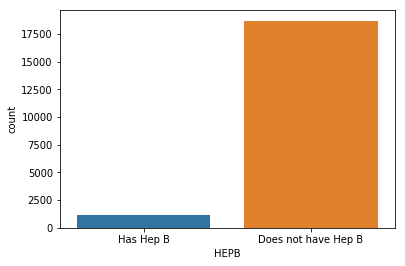

In [11]:
# Write your code here
# looking at distribution of ppl who have HEPB and those who don't
hepb = sns.countplot(x='HEPB', data = mydat)
hepb.set_xticklabels(labels=['Has Hep B', 'Does not have Hep B'])

[Text(0, 0, 'Straight'), Text(0, 0, 'Gay'), Text(0, 0, 'Bi')]

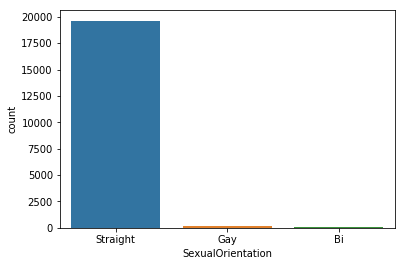

In [12]:
# looking at distribution of sexuality -> most ppl are straight, so this may not be a great indicator
hepb = sns.countplot(x='SexualOrientation', data = mydat)
hepb.set_xticklabels(labels=["Straight", "Gay", "Bi", "Other", "Unknown", "Refused", "Don't Know"])

[Text(0, 0, 'Mexican American'),
 Text(0, 0, 'Other Hispanic'),
 Text(0, 0, 'Non-Hispanic White'),
 Text(0, 0, 'Non-Hispanic Black'),
 Text(0, 0, 'Non-Hispanic Asian'),
 Text(0, 0, 'Other Race')]

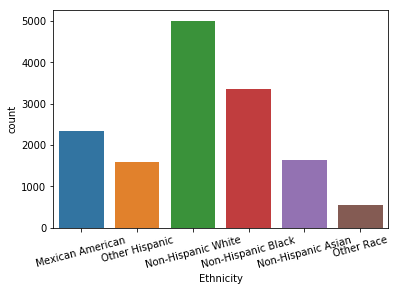

In [13]:
# showing distribution of race in the data set
etplt = sns.countplot(x = 'Ethnicity', data = mydat)
etplt.set_xticklabels(labels=('Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian','Other Race'),rotation=15)

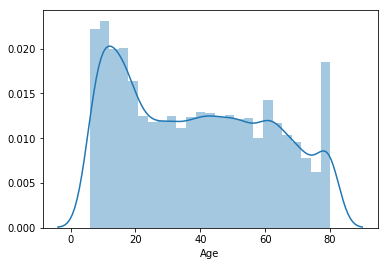

In [14]:
sns.distplot(mydat.Age)

AttributeError: 'FacetGrid' object has no attribute 'legend'

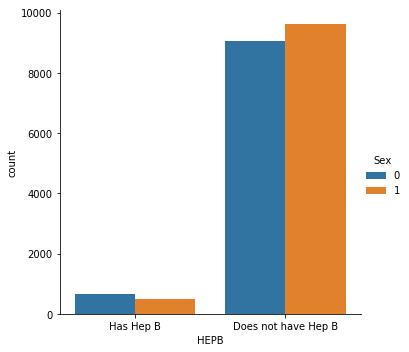

In [15]:
g = sns.catplot(x="HEPB", hue="Sex", data=mydat,
                 kind="count")
g.set_xticklabels(labels=['Has Hep B', 'Does not have Hep B'])
g.legend(title='Sex', loc='upper left', labels=['Male', 'Female'])


In [16]:
mydat.corr()

,HEPB,Marriage,Income,Jaundice,HIV,Immunization,HEPBSurfaceAntibody,SexualOrientation,Alcohol,Cholesterol,Sex,Hypertension,Ethnicity,BloodTransfusion,Age
HEPB,1.000000,0.035571,0.027365,0.050878,0.071075,-0.043233,0.215911,-0.053922,0.011046,-0.054664,0.043689,0.059663,-0.166925,0.008515,-0.193469
Marriage,0.035571,1.000000,-0.183850,0.031921,-0.038253,-0.028122,-0.152268,0.062270,0.004538,-0.089209,-0.003695,0.144216,0.023440,0.036732,-0.435569
Income,0.027365,-0.183850,1.000000,-0.014622,0.019170,-0.004222,-0.002725,-0.007679,0.013395,0.081713,-0.036939,0.012762,0.148908,-0.006959,0.133553
Jaundice,0.050878,0.031921,-0.014622,1.000000,0.021130,-0.012817,0.003080,-0.008325,0.005138,-0.030126,0.009350,0.020521,-0.013574,0.011896,-0.066361
HIV,0.071075,-0.038253,0.019170,0.021130,1.000000,0.002593,0.002737,-0.174269,0.047102,0.012848,0.042574,0.026351,-0.005042,0.023548,-0.027538
Immunization,-0.043233,-0.028122,-0.004222,-0.012817,0.002593,1.000000,0.127567,0.014283,0.005737,0.100001,-0.025611,-0.013848,-0.052741,0.013653,0.215155
HEPBSurfaceAntibody,0.215911,-0.152268,-0.002725,0.003080,0.002737,0.127567,1.000000,-0.005049,0.006583,0.095469,-0.032914,-0.127136,-0.114573,-0.004473,0.247105
SexualOrientation,-0.053922,0.062270,-0.007679,-0.008325,-0.174269,0.014283,-0.005049,1.000000,-0.007236,0.027455,-0.096223,0.026917,0.012994,-0.006383,0.006658
Alcohol,0.011046,0.004538,0.013395,0.005138,0.047102,0.005737,0.006583,-0.007236,1.000000,0.009789,-0.035240,-0.004199,0.005147,-0.009178,0.002992
Cholesterol,-0.054664,-0.089209,0.081713,-0.030126,0.012848,0.100001,0.095469,0.027455,0.009789,1.000000,0.069643,-0.029311,0.004777,-0.007343,0.323303


## Preprocessing data

Before we begin to implement a model, we need to prepare the variables that will be used. At this step we convert categorical variables into dummy\indicator variables (https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/). Additionally, you'll have to normalize and transform variables if necessary.

In [17]:
# Write your code here
for col in categorical_columns:
    print(col, mydat[col].unique()) 

SexualOrientation [1. 2. 3.]
Marriage [ 1. nan  3.  2.]
HEPBSurfaceAntibody [ 2.  1. nan]
HIV [ 2. nan  1.  3.]
Jaundice [nan  2.  1.]
Sex [0 1]
HEPB [1 0]
BloodTransfusion [ 2.  1.  9.  7. nan]
Hypertension [ 2. nan  1.  9.]
Immunization [3 9 1 2 7]
Ethnicity [nan  3.  6.  4.  7.  1.  2.]


In [18]:
# creating indicator/dummify for each level of your categorical variable
mydat1 = pd.get_dummies(mydat, columns = ["SexualOrientation", "Marriage", "Jaundice", "Ethnicity", "Sex", "HEPBSurfaceAntibody", "SexualOrientation", "Immunization", "HIV", "BloodTransfusion", "Hypertension"])

mydat1.head()


,HEPB,Income,Alcohol,Cholesterol,Age,SexualOrientation_1.0,SexualOrientation_2.0,SexualOrientation_3.0,Marriage_1.0,Marriage_2.0,...,HIV_1.0,HIV_2.0,HIV_3.0,BloodTransfusion_1.0,BloodTransfusion_2.0,BloodTransfusion_7.0,BloodTransfusion_9.0,Hypertension_1.0,Hypertension_2.0,Hypertension_9.0
0,1,1.36,0.000000,3.49,34,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,1,2.27,3.919725,4.97,16,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0.81,3.919725,4.16,10,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.69,0.000000,5.22,60,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1.91,20.000000,6.70,49,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


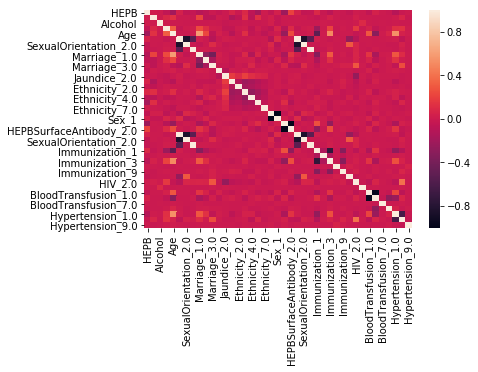

In [19]:
sns.heatmap(mydat1.corr())

In [20]:
# normalizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_data = mydat1.Age.values.reshape(-1, 1)
scaler.fit(norm_data)
mydat1['nAge'] = scaler.transform(norm_data)

#data_unitnorm
#sns.distplot(mydat1['nAge'])

mydat1 = mydat1.drop(['Age'], axis=1)

norm_data = mydat1.Alcohol.values.reshape(-1, 1)
scaler.fit(norm_data)
mydat1['nAlcohol'] = scaler.transform(norm_data)
mydat1 = mydat1.drop(['Alcohol'], axis=1)

norm_data = mydat1.Cholesterol.values.reshape(-1, 1)
scaler.fit(norm_data)
mydat1['nCholesterol'] = scaler.transform(norm_data)
mydat1 = mydat1.drop(['Cholesterol'], axis=1)

norm_data = mydat1.Income.values.reshape(-1, 1)
scaler.fit(norm_data)
mydat1['nIncome'] = scaler.transform(norm_data)
mydat1 = mydat1.drop(['Income'], axis=1)

mydat1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,HEPB,SexualOrientation_1.0,SexualOrientation_2.0,SexualOrientation_3.0,Marriage_1.0,Marriage_2.0,Marriage_3.0,Jaundice_1.0,Jaundice_2.0,Ethnicity_1.0,...,BloodTransfusion_2.0,BloodTransfusion_7.0,BloodTransfusion_9.0,Hypertension_1.0,Hypertension_2.0,Hypertension_9.0,nAge,nAlcohol,nCholesterol,nIncome
0,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,-0.205357,-0.395327,-1.148553,-0.621101
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,-1.002739,0.000000,0.239549,-0.032733
2,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,-1.268534,0.000000,-0.520155,-0.976708
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0.946419,-0.395327,0.474025,-1.054295
4,1,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.459129,1.621790,1.862127,-0.265494


## Model training and selection
Now, let's split our data into training and testing in an 80-20 split, stratified by HEPB distribution (this tries to keep the HEPB distribution approximately equal for the training and test set). For consistency, let's use a random seed 0.

In [21]:
# Write your code here

from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(mydat1, test_size = 0.20, random_state = 0, stratify = mydat['HEPB'])


y_train = data_train['HEPB']
y_val = data_val['HEPB']

# only features 
X_train = data_train[["nAge", "Marriage_1.0", "Marriage_2.0", "Marriage_3.0", "Sex_0", "Sex_1", "nIncome", "nAlcohol", "Sex_0", "Sex_1", "Jaundice_1.0", "Jaundice_2.0",  "Ethnicity_1.0","Ethnicity_2.0", "Ethnicity_3.0","Ethnicity_4.0", "Ethnicity_6.0", "Ethnicity_7.0", "HIV_1.0", "HIV_2.0"]]
X_val = data_val[["nAge", "Marriage_1.0", "Marriage_2.0", "Marriage_3.0", "Sex_0", "Sex_1", "nIncome", "nAlcohol", "Sex_0", "Sex_1", "Jaundice_1.0", "Jaundice_2.0",  "Ethnicity_1.0","Ethnicity_2.0", "Ethnicity_3.0","Ethnicity_4.0", "Ethnicity_6.0", "Ethnicity_7.0", "HIV_1.0", "HIV_2.0"]]


X_train.head()

,nAge,Marriage_1.0,Marriage_2.0,Marriage_3.0,Sex_0,Sex_1,nIncome,nAlcohol,Sex_0,Sex_1,Jaundice_1.0,Jaundice_2.0,Ethnicity_1.0,Ethnicity_2.0,Ethnicity_3.0,Ethnicity_4.0,Ethnicity_6.0,Ethnicity_7.0,HIV_1.0,HIV_2.0
13206,-0.559749,0,0,1,0,1,-1.274125,0.000000,0,1,0,1,0,0,0,1,0,0,0,1
7478,1.079316,0,0,1,0,1,-0.750413,-0.294471,0,1,0,0,0,0,1,0,0,0,0,0
18218,-1.047038,0,0,0,1,0,-0.116785,0.000000,1,0,0,1,0,0,1,0,0,0,0,0
2330,1.433708,0,1,0,1,0,-0.006870,-0.294471,1,0,0,0,0,0,0,0,0,0,0,0
14058,0.016139,1,0,0,0,1,0.633223,0.000000,0,1,0,1,0,0,1,0,0,0,0,1


In [490]:
#testing cell don't run
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(mydat1, test_size = 0.20, random_state = 0, stratify = mydat['HEPB'])


y_train = data_train['HEPB']
y_val = data_val['HEPB']

# only features 
X_train = data_train[["Marriage_1.0", "Marriage_2.0", "Marriage_3.0", "Ethnicity_1.0","Ethnicity_2.0", "Ethnicity_3.0","Ethnicity_4.0", "Ethnicity_6.0", "Ethnicity_7.0", "HIV_1.0", "HIV_2.0", 'nIncome', 'Jaundice_1.0', 'Jaundice_2.0']]
X_val = data_val[["Marriage_1.0", "Marriage_2.0", "Marriage_3.0", "Ethnicity_1.0","Ethnicity_2.0", "Ethnicity_3.0","Ethnicity_4.0", "Ethnicity_6.0", "Ethnicity_7.0", "HIV_1.0", "HIV_2.0", 'nIncome', 'Jaundice_1.0', 'Jaundice_2.0']]


X_train.head()

,Marriage_1.0,Marriage_2.0,Marriage_3.0,Ethnicity_1.0,Ethnicity_2.0,Ethnicity_3.0,Ethnicity_4.0,Ethnicity_6.0,Ethnicity_7.0,HIV_1.0,HIV_2.0,nIncome,Jaundice_1.0,Jaundice_2.0
7157,0,0,0,1,0,0,0,0,0,0,1,-0.554225,0,1
3071,0,0,0,0,0,0,1,0,0,0,0,-1.079073,0,0
6716,1,0,0,0,0,0,1,0,0,0,0,-1.182746,0,1
3714,1,0,0,0,0,0,0,1,0,0,0,-0.009939,0,0
8134,0,1,0,0,1,0,0,0,0,0,0,-1.098512,0,1


In [500]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(mydat1, test_size = 0.20, random_state = 0, stratify = mydat['HEPB'])


y_train = data_train['HEPB']
y_val = data_val['HEPB']

# only features 
X_train = data_train[["Marriage_1.0", "Marriage_2.0", "Marriage_3.0", "nAge", "Ethnicity_1.0","Ethnicity_2.0", "Ethnicity_3.0","Ethnicity_4.0", "Ethnicity_6.0", "Ethnicity_7.0", "HIV_1.0", "HIV_2.0", 'nIncome']]
X_val = data_val[["Marriage_1.0", "Marriage_2.0", "Marriage_3.0", "nAge", "Ethnicity_1.0","Ethnicity_2.0", "Ethnicity_3.0","Ethnicity_4.0", "Ethnicity_6.0", "Ethnicity_7.0", "HIV_1.0", "HIV_2.0", 'nIncome']]


X_train.head()

,Marriage_1.0,Marriage_2.0,Marriage_3.0,nAge,Ethnicity_1.0,Ethnicity_2.0,Ethnicity_3.0,Ethnicity_4.0,Ethnicity_6.0,Ethnicity_7.0,HIV_1.0,HIV_2.0,nIncome
7157,0,0,0,-0.850282,1,0,0,0,0,0,0,1,-0.554225
3071,0,0,0,-1.073199,0,0,0,1,0,0,0,0,-1.079073
6716,1,0,0,1.066811,0,0,0,1,0,0,0,0,-1.182746
3714,1,0,0,1.066811,0,0,0,0,1,0,0,0,-0.009939
8134,0,1,0,1.869315,0,1,0,0,0,0,0,0,-1.098512


Now we can use our training data to create the model and  make predicitons with your test data.

In [505]:
#Write your code here

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
results = logreg.fit(X_train, y_train)

C:\Users\Shuen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [506]:
from sklearn.metrics import auc

# apply the model to test data
y_val_predict = logreg.predict(X_val)
y_val_proba = logreg.predict_proba(X_val)

print(y_val[:5],y_val_predict[:5])

2901    1
6979    1
7192    1
2045    0
9217    1
Name: HEPB, dtype: uint8 [1 1 1 1 1]


# Scoring Metrics
## Confusion Matrix Metrics

There are several useful metrics that are derived from the confusion matrix:

![alt text](https://i.imgur.com/uipmEwt.png)

* sensitivity, **recall**, hit rate, or true positive rate (TPR) : $ \mathrm {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}$
 
* **precision** or positive predictive value (PPV) : $ \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$

* specificity or true negative rate (TNR) : $\mathrm {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}$

* miss rate or false negative rate (FNR) : $ \mathrm {FNR} ={\frac {\mathrm {FN} }{P}}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR}$

* fall-out or false positive rate (FPR) : $\mathrm {FPR} ={\frac {\mathrm {FP} }{N}}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} $

* accuracy (ACC) : $\mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$

Now use code below to calculate the confusion matrix.

In [494]:
# write your code here

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- you'll need a different method to do multi-class case
def cm_metric(y_true,y_prob):
    
    # predict the class with the greatest probability
    y_pred = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -2], [-2, 1]]))))

cm_metric(y_val,y_val_proba)

-0.954706730236168

The model is classifying everything as class 1... Pretty terrible. :( Well maybe there's a threshold where this doesn't happen. Let's look at the AUC ROC.

## AUC ROC

A receiver operating characteristic (ROC) is a probability curve that plots the true positive rate (y) against the false positive rate (x) at many decision threshold settings. The area under the curve (AUC) represents a measure of separability or how much the model is capable of distinguishing between classes. An AUC closer to 1 is desirable as it shows the model is perfectly distinguishing between patients with disease and no disease. A poor model has an AUC $\leq$ 0.50.

In [507]:
#extract fpr and tpr to plot ROC curve and calculate AUC (Note: fpr-false positive rate and tpr -true positive rate)
fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1]) 

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

AUC:  0.8308085707949884


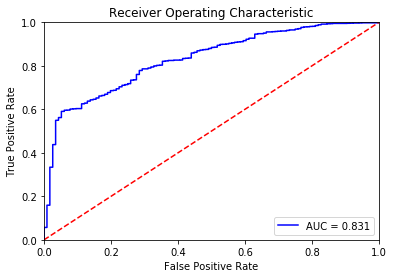

In [508]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This model only looks at three possible features and leaves lots of room for improvement!  Try using more features, different models, and see if you can do anything about the data we threw out earlier.

## Economic Cost
Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics--in this case, economic feasibility. In essence, we want you to minimize the amount of time and money spent on data collection by **reducing the number of features** collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method.  This won't be evaluated quantitatively, but please consider discussing it for your presentation.

For your presentation on Friday, don't foget to mention why you selected the features you used, the model implemented, the scoring metrics mentioned above, and the limitations of your analysis.

# Next steps
For those that finish early, try different classification models such as decision trees, KNN, SVM etc. You can try tackling the multiclass classifier (predicting the different cases instead of simply negative or positive)!

Given the rich data set provided feel free to study a research question of your interest. Have fun! (: